# Saturation excess or Dunnian runoff 
## Water table rise
    -Author: Niccolò Tubini and Riccardo Rigon
    -License: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
_____   

## Table of Contents

* [Expectations](#Expectations)
* [Meta data](#Meta_data)
* [Reference](#Reference)
* [Description](#Description")
* [Visualize the output](#Visualize-the-output)


## Expectations
The definition of the surface boundary condition is a nontrivial task since it is a system-dependent boundary condition. The infiltration rate through the soil surface depends on precipitation, rainfall intensity $J$, and on the moisture condition of the soil. Because of this, the surface boundary condition may change from the Dirichlet type - prescribed water suction - to the Neumann type - prescribed flux - and vice-versa. The works by Horton (1933) and Dunne and Black (1970) establish the conceptual framework to explain the runoff generation. The saturation excess or Dunnian runoff occurs when the soil is saturated and additional water exfiltrates at the soil surface.
Saturation excess generally occurs with long-duration, moderate rainfall, or with a series of successive precipitation events.
In this case the soil depth or the presence of shallow fragipan are determining factors for saturation excess. Another possible
cause is the rise of the water table up to the soil surface.

Here we present a simulation in which water exfiltrates at soil surface as a consequence of the raising of the water table. 

The saturation excess is more critical, in terms of simulation stability, than the infiltration excess ([reference](https://www.pc-progress.com/forum/viewtopic.php?f=3&t=3632))
## Meta data

| Data  | Value  |
|:---|:---|
| Model name| WHETGEO-1D |
| Model version  |  v0.98 |
| Model reference | Tubini and Rigon (2021) |
| Grid input file | `data/Grid_NetCDF/DunnianRunOff_clayloam.nc` |
| Surface boundary condition file | `data/Timeseries/DunnianRunOff_0.csv` |
| Bottom boundary condition file | `data/Timeseries/DunnianRunOff_water_table.csv` |
| .sim file | `simulation/Richards1D_DunnianRunOff_water_table_rise.sim` |

## Reference
Horton, R. E.: The role of infiltration in the hydrologic cycle, Eos, Transactions American Geophysical Union, 14, 446–460, 1933.

Dunne, T. and Black, R. D.: An experimental investigation of runoff production in permeable soils, Water Resources Research, 6, 478–490,
1970.


In [3]:
import os
import pandas as pd
import numpy as np
# import datetime as datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
%matplotlib inline

import math
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

plt.rcParams.update(nice_fonts)

linewidth_n = 0.8
linewidth_a = 0.9
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
project_path = os.path.dirname(os.getcwd())

In [4]:
myCmapPsi = cl.LinearSegmentedColormap.from_list('my_list',['#ffffd9', '#edf8b1','#c7e9b4', '#7fcdbb','#41b6c4', '#1d91c0', '#225ea8', '#253494', '#081d58'],N=5000)


# Description

In this numerical experiment we consider a layered soil of 3 [m] depth. The thickness of the loamy layer and clay layer are, respectively, $0.5$ [m], and $2.5$ [m]. The soil hydraulic properties are described with the Van Genuchten’s model 

|$\theta_r$ [-]|$\theta_s$ [-]|$\alpha$ [m$^{-1}$] |$n$ [-]|$K_s$ [m s$^{-1}$]   |  
|--------------|--------------|--------------------|-------|---------------------|
|$0.078$       |$0.43$        |$3.6$               |$1.56$ |$2.8889 \times 10^{-6}$|
|$0.068$       |$0.38$        |$0.8$               |$1.09$ |$5.5556 \times 10^{-7}$|

At the surface boundary condition we prescribe no rainfall, while at the botto a variable Dirichlet boundary condition is prescribed. The transient is driven by variation of the water table. The initial condition is assumed to be hydrostatic with $\psi=0$ [m] at the bottom.

# Visualize output

In [5]:
os.chdir(project_path+'/output')

In [6]:
ds = xr.open_dataset("Sim_DunnianRunOff_water_table_rise_0000.nc")
ds.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:        (depth: 601, dualDepth: 601, time: 105121)
Coordinates:
  * depth          (depth) float64 -2.998 -2.993 -2.988 ... -0.0075 -0.0025 0.0
  * dualDepth      (dualDepth) float64 -3.0 -2.995 -2.99 ... -0.01 -0.005 0.0
  * time           (time) datetime64[ns] 2017-01-01 ... 2018-01-01
Data variables:
    psi            (time, depth) float64 ...
    psiIC          (depth) float64 ...
    T              (depth) float64 ...
    theta          (time, depth) float64 ...
    darcyVelocity  (time, dualDepth) float64 ...
    waterVolume    (time, depth) float64 ...
    error          (time) float64 ...
    topBC          (time) float64 ...
    bottomBC       (time) float64 ...
    runOff         (time) float64 ...
    controlVolume  (depth) float64 ...
Attributes:
    Description_of_the_problem:         Dunnian runoff test case, water table...
    Top_boundary_condition:             Top coupled
    Bottom_boundary_condition:         

In [7]:
ds_mean = ds.resample(time='1D').mean()

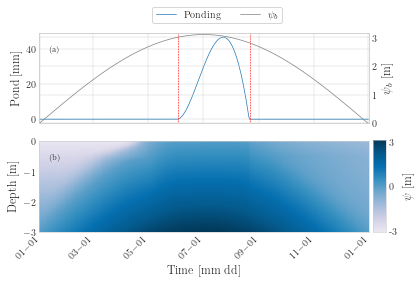

In [12]:
line_w = 0.7


start_date = '2017-01-01 00:00'
end_date = '2018-01-01 00:00'

plot_width = 15/2.54

fig, ax = plt.subplots(2, 1, sharex='col', gridspec_kw={'height_ratios': [1,1]},figsize=(plot_width,plot_width/1.618))

lns1 = ax[0].plot(ds_mean.time.sel(time=slice(start_date, end_date)).values, ds_mean.waterVolume.sel(depth=0).sel(time=slice(start_date,end_date))*1000, label='Ponding', color='#1f78b4', linewidth=line_w)

ax0twin = ax[0].twinx()
lns2 = ax0twin.plot(ds_mean.time.sel(time=slice(start_date, end_date)).values, ds_mean.bottomBC.sel(time=slice(start_date,end_date)), label='$\psi_b$', linewidth=line_w, color='0.5')
ax0twin.set_ylim([-0.001, 3.15])
ax0twin.set_yticks([0.0, 1, 2, 3])


ax0twin.set_ylabel('$\psi_b$ [m]')
ax[0].set_ylabel('Pond [mm]')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax[0].legend(lns, labs, bbox_to_anchor=(0.75,1.35) , ncol=2)


norm = matplotlib.colors.Normalize(vmin=-3.1, vmax=3.1)
im = ds_mean.psi.sel(time=slice(start_date, end_date)).plot(ax=ax[1], y='depth', add_colorbar=False, cmap=my_cmap, norm=norm)                                               
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Time [mm dd]')

cbaxes = fig.add_axes([0.91, 0.122, 0.03, 0.35]) 
cbar = fig.colorbar(im, ax=ax[1],orientation="vertical",fraction=0.07, pad=0.1, cax=cbaxes, label='$\psi$ [m]',ticks=[-3, 0.0, 3])
cbar.ax.set_yticklabels(['-3', '0', '3'])


ax[0].axvline(x=ds_mean.time.sel(time='2017-06-03 00:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')
ax[0].axvline(x=ds_mean.time.sel(time='2017-08-22 00:00').values, linewidth=0.8, linestyle=(0, (1, 1)), color='red')


ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax[1].xaxis.set_tick_params(rotation=45)

plt.text( 0.03,0.8, '(a)', fontsize=8,
             transform=ax[0].transAxes)
plt.text( 0.03,0.8, '(b)', fontsize=8,
             transform=ax[1].transAxes)


plt.show()

Panel (a) shows the water table position, Dirichlet boundary condition, and the water ponding at the soil surface. The dotted
red lines indicate the times at which the boundary condition at the soil surface should be switched. The first line indicates the switch from
the Neumann type to the Dirichlet type since water starts building up. The second line indicates the switch form the Dirichlet type to the
Neumann type because there is no water at the soil surface. Panel (b) shows the time evolution of the water suction within the soil.